In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  250 non-null    object 
 1   Price    250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [4]:

data['Mileage'] = data['Mileage'].str.replace(' km', '', regex=True)
data['Mileage'] = data['Mileage'].str.replace(',', '')
data['Mileage'] = data['Mileage'].astype(int)

print(data.head())

   Mileage    Price
0   131958  6511.50
1   156867  5133.40
2   141932  5829.99
3   113694  6652.88
4   129879  5979.41


In [5]:
X = np.array(data.Mileage)
Y = np.array(data.Price)

In [6]:
X

array([131958, 156867, 141932, 113694, 129879, 120268, 217892,  64886,
       147337, 223458, 178266,  97498, 122727, 136324, 185203, 201335,
        26023,  51090,  77221,  74820,  10769,  69735, 204027,  74925,
       209041,  15311, 113355, 245796, 224176, 194779,  95305, 169765,
       213004, 234088, 140608, 248042, 166730,  94478, 132537, 159503,
       140523,  12747, 133855, 200222,  75725, 139981,  94654, 176845,
       129346,  77435,  66886,  76803,  41551, 126216,  21394,  79092,
        13890,  51606, 237348, 221110,  97313, 151699,  18792, 249931,
       249629, 215041, 184073, 217624, 164969,  78148, 134243, 130174,
       164555, 134358,  58555,  27159, 120510, 116530,  90077,  45920,
       233139, 208193, 210551, 230547,  29457, 207629, 218261,  88953,
        62995, 181829,  19692, 186830, 213481, 212283, 206769,  47065,
       233165, 109299, 173678,  21534, 235735,  50397, 101387,  11016,
       230861,  65591, 230884,  33247,  34300, 215137,  92798,  19268,
      

In [7]:
Y

array([6511.5 , 5133.4 , 5829.99, 6652.88, 5979.41, 6183.4 , 5185.52,
       8204.77, 5832.38, 4488.76, 6053.19, 6336.8 , 6714.47, 7260.81,
       6278.46, 4003.34, 8098.23, 8062.53, 6794.64, 7169.48, 8715.97,
       8305.96, 4896.76, 7609.97, 5075.39, 8965.52, 6746.95, 3485.54,
       4911.32, 5320.16, 6545.52, 5263.55, 5183.68, 4620.98, 5827.69,
       3904.19, 5593.67, 7418.94, 6973.73, 5842.76, 6774.14, 9000.  ,
       6425.73, 4273.82, 6971.64, 6571.  , 6251.66, 5522.59, 6913.32,
       7527.51, 7361.58, 7040.63, 8577.06, 6711.53, 8429.38, 7950.81,
       9000.  , 8862.18, 4536.49, 4495.55, 6982.24, 4998.73, 8699.49,
       3993.52, 3342.38, 4686.54, 5990.12, 4280.25, 5220.67, 7989.5 ,
       6632.26, 7927.07, 5049.61, 6673.03, 7986.85, 8486.46, 7045.06,
       6654.54, 6230.27, 7657.92, 5019.44, 5422.15, 4602.42, 4640.86,
       9000.  , 4831.83, 4628.99, 7316.24, 8043.59, 5188.97, 8909.22,
       4291.29, 4898.58, 4779.65, 4755.89, 7821.07, 4032.01, 6407.26,
       4367.41, 8435

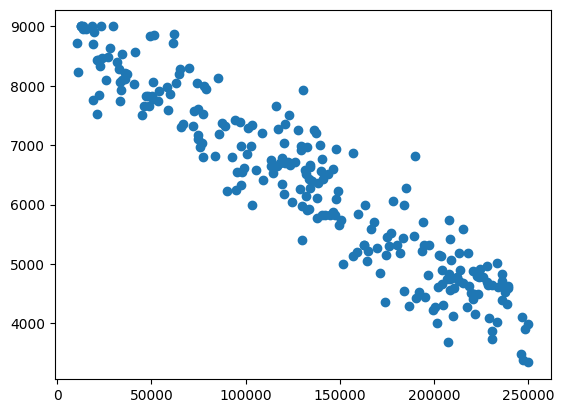

In [8]:
plt.scatter(X, Y)

In [9]:
def scale(X, Y):
    Xmax, Xmin = X.max(), X.min()
    Ymax, Ymin = Y.max(), Y.min()
    Xscaled = (X - Xmin) / (Xmax - Xmin)
    Yscaled = (Y - Ymin) / (Ymax - Ymin)
    return Xscaled, Yscaled

In [10]:
Xscaled, Yscaled = scale(X, Y)

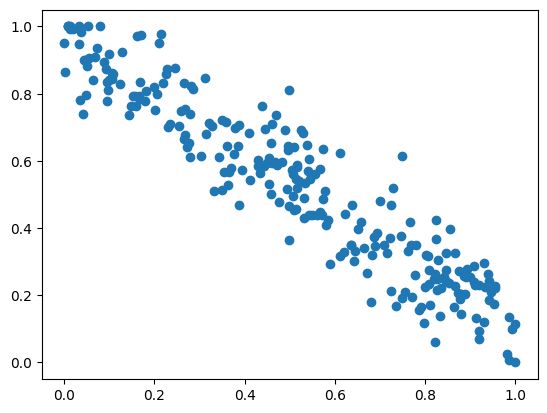

In [11]:
plt.scatter(Xscaled, Yscaled)

In [12]:
def mean_squared_error(n, m, b, Xscaled, Yscaled):
    mean_sqr_err = 0
    for i in range(n):
        Y_pred = m * Xscaled[i] + b
        mean_sqr_err += (Yscaled[i] - Y_pred) ** 2
    return mean_sqr_err / n

In [13]:
def gradient_descent(Xscaled, Yscaled, L=0.1, epochs=400):    
    m = 0
    b = 0

    n = float(len(Xscaled))

    for epoch in range(epochs):
        if epoch % 50 == 0:
            print(f"iteration {epoch} => MSE = {mean_squared_error(int(n), m, b, Xscaled, Yscaled)}")
        Y_pred = m * Xscaled + b

        Dm = -(2/n) * sum(Xscaled * (Yscaled - Y_pred))
        Db = -(2/n) * sum(Yscaled - Y_pred)

        m = m - L * Dm
        b = b - L * Db

    return m, b

In [14]:
m, b = gradient_descent(Xscaled, Yscaled, 0.1, 450)

iteration 0 => MSE = 0.34769594326218617
iteration 50 => MSE = 0.03276570361061284
iteration 100 => MSE = 0.014166916170526636
iteration 150 => MSE = 0.009263472662439563
iteration 200 => MSE = 0.007970713211615204
iteration 250 => MSE = 0.007629885996018772
iteration 300 => MSE = 0.007540029224275851
iteration 350 => MSE = 0.007516339099020079
iteration 400 => MSE = 0.0075100933590079594


In [15]:
def r2_score(Y_true, Y_pred):
    ss_res = np.sum((Y_true - Y_pred) ** 2)
    ss_tot = np.sum((Y_true - np.mean(Y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [16]:
def mean_absolute_error(Y_true, Y_pred):
    return np.mean(np.abs(Y_true - Y_pred))

In [17]:
Ymax, Ymin = Y.max(), Y.min()
Y_pred = m * Xscaled + b
Y_pred_original = Y_pred * (Ymax - Ymin) + Ymin

In [18]:
r2 = r2_score(Y, Y_pred_original)
mae = mean_absolute_error(Y, Y_pred_original)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")

R² Score: 0.8895585747159924
Mean Absolute Error: 387.6837425083147


In [19]:
Y_pred_scaled = m * Xscaled + b
Y_pred_original = Y_pred_scaled * (Ymax - Ymin) + Ymin

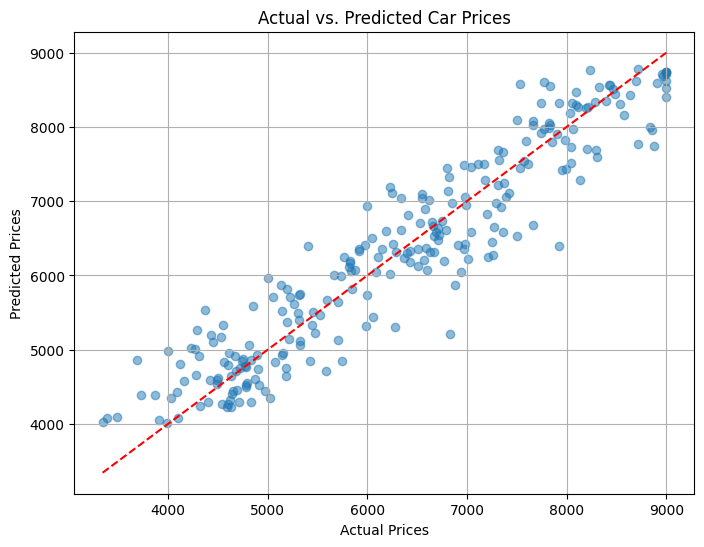

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(Y, Y_pred_original, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--', label="Perfect Fit Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices")
plt.grid(True)